<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [10]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install opendatasets --upgrade --quiet

In [42]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.tree import DecisionTreeClassifier
from process_bank_churn import preprocess_data
from sklearn.metrics import auc, roc_curve
import seaborn as sns

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 86.6MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [13]:
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu/train.csv')
raw_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [14]:
categorical_cols =  raw_df.select_dtypes(include='object').drop(columns=['Surname']).columns.tolist()

In [17]:
data = preprocess_data(raw_df, 'Exited', scaler_numeric=False, categorical_cols=categorical_cols )

In [18]:
X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [23]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [26]:
def roc_auc(model, df, target, name=''):
  preds = model.predict(df)
  fpr, tpr, thresholds = roc_curve(target, preds, pos_label=1.0)
  roc_auc = auc(fpr, tpr)
   # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

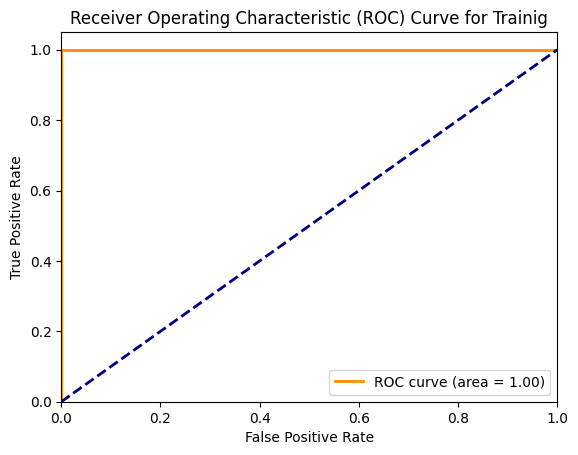

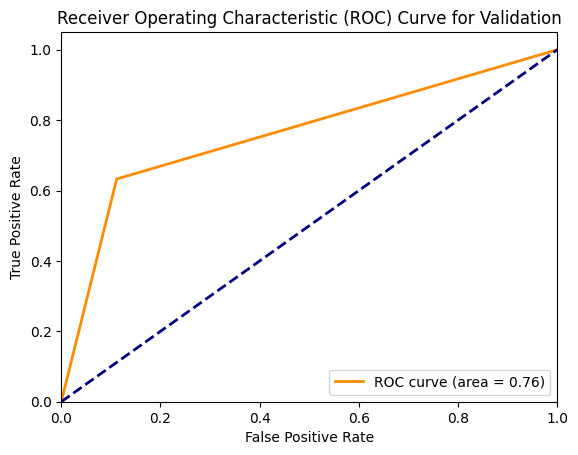

In [28]:
roc_auc(model, X_train, train_targets, 'Trainig')
roc_auc(model, X_val, val_targets, 'Validation')

Модель перенавчається

In [32]:
model.tree_.max_depth

23

In [34]:
model_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
model_2.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [40]:
model_2.feature_importances_.round(2)
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance' : model_2.feature_importances_.round(2)
})
importance_df.sort_values('importance', ascending = False)

,feature,importance
3,Age,0.71
6,NumOfProducts,0.29
0,id,0.00
1,CustomerId,0.00
2,CreditScore,0.00
4,Tenure,0.00
5,Balance,0.00
7,HasCrCard,0.00
8,IsActiveMember,0.00
9,EstimatedSalary,0.00


Важливими є лише 2 ознаки: Age i NumOfProducts

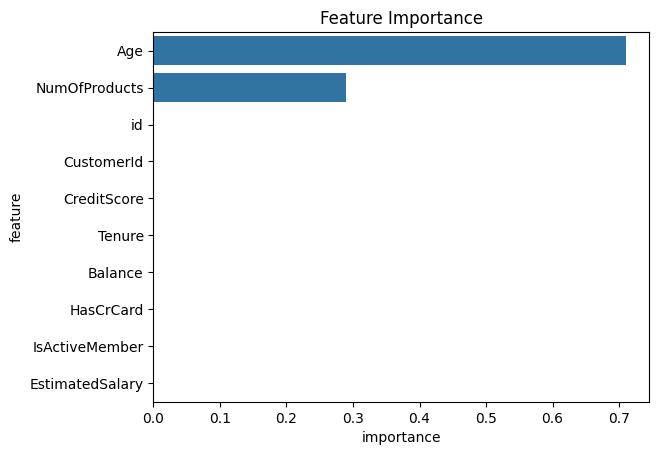

In [44]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.sort_values('importance', ascending = False).head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

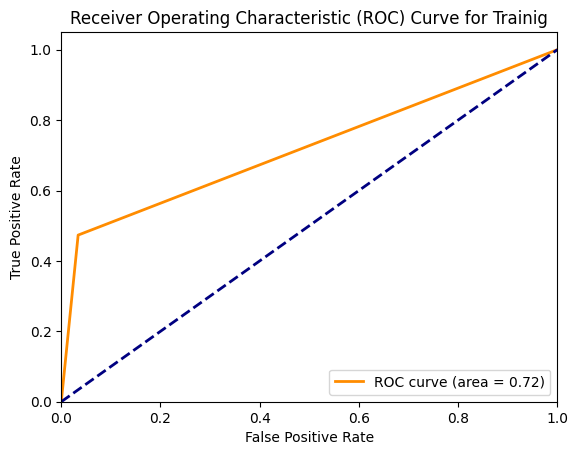

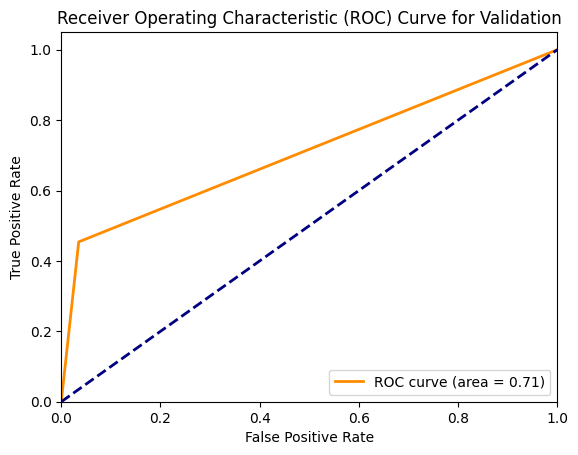

In [46]:
model3 = DecisionTreeClassifier(random_state=42, max_depth=2)
model3.fit(X_train, train_targets)
roc_auc(model3, X_train, train_targets, 'Trainig')
roc_auc(model3, X_val, val_targets, 'Validation')

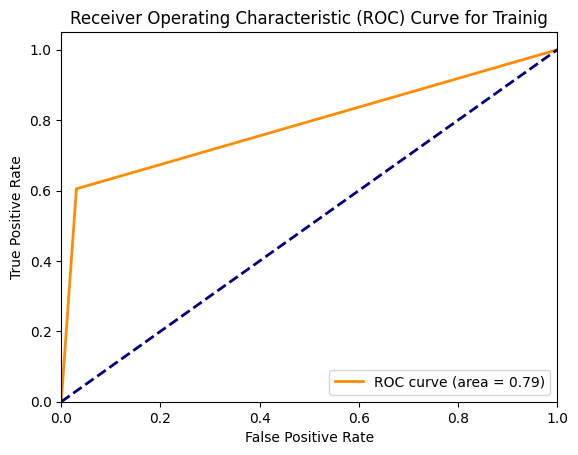

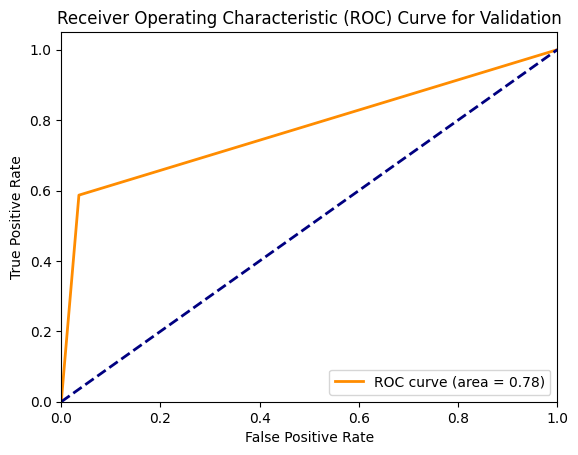

In [47]:
model4 = DecisionTreeClassifier(random_state=42, max_depth=5)
model4.fit(X_train, train_targets)
roc_auc(model4, X_train, train_targets, 'Trainig')
roc_auc(model4, X_val, val_targets, 'Validation')

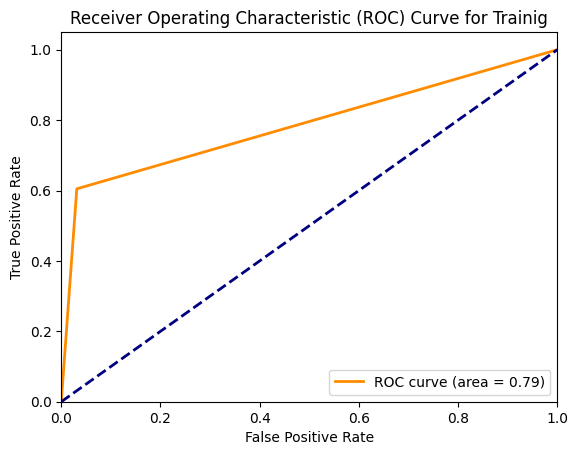

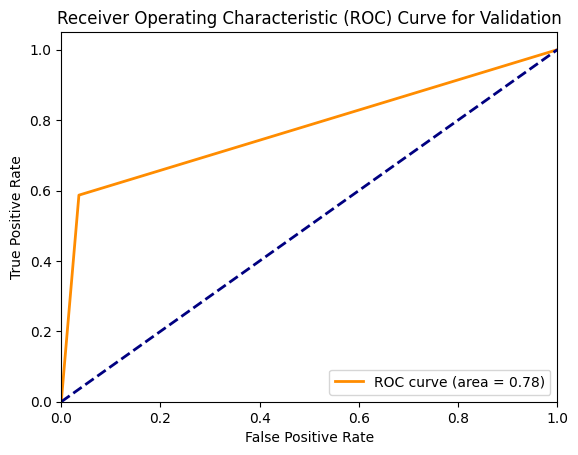

In [49]:
model5 = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=20)
model5.fit(X_train, train_targets)
roc_auc(model5, X_train, train_targets, 'Trainig')
roc_auc(model5, X_val, val_targets, 'Validation')

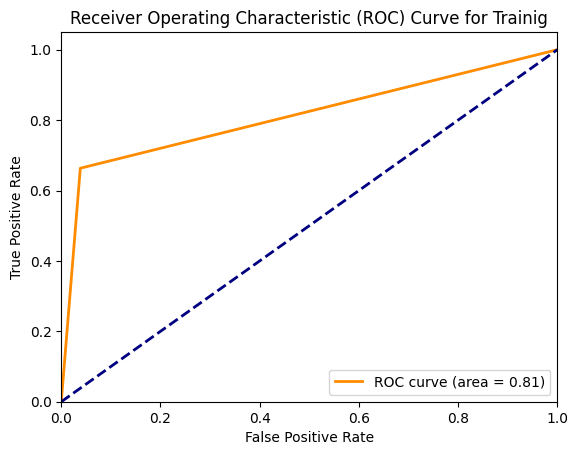

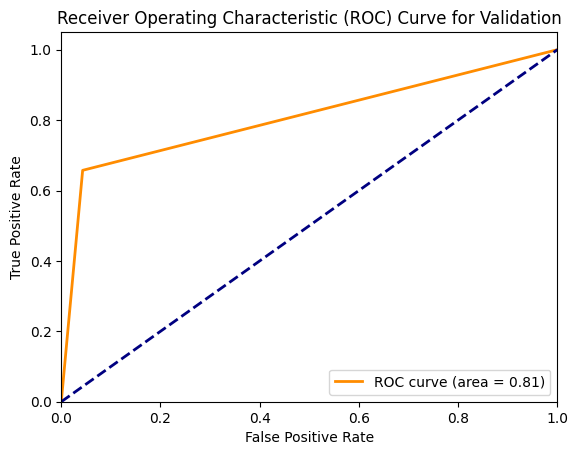

In [50]:
model6 = DecisionTreeClassifier(random_state=42, max_depth=10, max_leaf_nodes=20)
model6.fit(X_train, train_targets)
roc_auc(model6, X_train, train_targets, 'Trainig')
roc_auc(model6, X_val, val_targets, 'Validation')

Висновок: із запропонованих варіантів найбільш ефективним є дерево з параметрами  max_depth=10, max_leaf_nodes=20

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [55]:
def compute_roc_auc(model, df, target, name=''):
  preds = model.predict(df)
  fpr, tpr, thresholds = roc_curve(target, preds, pos_label=1.0)
  roc_auc = auc(fpr, tpr)
  return roc_auc

In [62]:
for max_depth in range(1,21):
  model = DecisionTreeClassifier(random_state=42, max_depth= max_depth)
  model.fit(X_train, train_targets)
  print( 'Train with max_depth =', max_depth, ' AUROC =', compute_roc_auc(model, X_train, train_targets, name='Train'))
  print('Validation with max_depth =', max_depth, ' AUROC =', compute_roc_auc(model, X_val, val_targets, name='Validation'))
  print(' ')

Train with max_depth = 1  AUROC = 0.7447268789076699
Validation with max_depth = 1  AUROC = 0.7348652170930791
 
Train with max_depth = 2  AUROC = 0.719689771949659
Validation with max_depth = 2  AUROC = 0.7094759585705468
 
Train with max_depth = 3  AUROC = 0.7596070646918104
Validation with max_depth = 3  AUROC = 0.744913917278277
 
Train with max_depth = 4  AUROC = 0.8058992479896435
Validation with max_depth = 4  AUROC = 0.7953014610055559
 
Train with max_depth = 5  AUROC = 0.7871408902482349
Validation with max_depth = 5  AUROC = 0.7756601961725771
 
Train with max_depth = 6  AUROC = 0.827403032205292
Validation with max_depth = 6  AUROC = 0.8097057411345085
 
Train with max_depth = 7  AUROC = 0.8222353066985836
Validation with max_depth = 7  AUROC = 0.7966252829412168
 
Train with max_depth = 8  AUROC = 0.8533826584674042
Validation with max_depth = 8  AUROC = 0.8086425680773717
 
Train with max_depth = 9  AUROC = 0.8628866411352287
Validation with max_depth = 9  AUROC = 0.79326

In [128]:
for max_depth in range(1, 50):
  model = DecisionTreeClassifier(random_state=42, max_depth= max_depth, criterion = 'entropy',max_leaf_nodes=1000)
  model.fit(X_train, train_targets)
  print( 'Train with max_depth =', max_depth, ' AUROC =', compute_roc_auc(model, X_train, train_targets, name='Train'))
  print('Validation with max_depth =', max_depth, ' AUROC =', compute_roc_auc(model, X_val, val_targets, name='Validation'))
  print(' ')

Train with max_depth = 1  AUROC = 0.7668423431135296
Validation with max_depth = 1  AUROC = 0.7636326222649017
 
Train with max_depth = 2  AUROC = 0.750675174403988
Validation with max_depth = 2  AUROC = 0.7455449619315452
 
Train with max_depth = 3  AUROC = 0.7905924671461395
Validation with max_depth = 3  AUROC = 0.7809829206392755
 
Train with max_depth = 4  AUROC = 0.7798846612405934
Validation with max_depth = 4  AUROC = 0.77273132587969
 
Train with max_depth = 5  AUROC = 0.808864719881669
Validation with max_depth = 5  AUROC = 0.8037759791480897
 
Train with max_depth = 6  AUROC = 0.8230807849451917
Validation with max_depth = 6  AUROC = 0.8176932574250634
 
Train with max_depth = 7  AUROC = 0.8200561887002564
Validation with max_depth = 7  AUROC = 0.8118320872487825
 
Train with max_depth = 8  AUROC = 0.841932970464044
Validation with max_depth = 8  AUROC = 0.8063584607997806
 
Train with max_depth = 9  AUROC = 0.8536757096079131
Validation with max_depth = 9  AUROC = 0.7969751

Висновок: найкраще перформить модель з параметрами  max_depth=6, criterion = 'entropy', max_leaf_nodes=1000

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [123]:
model_final = DecisionTreeClassifier(random_state=42, max_depth=5, criterion = 'entropy', max_leaf_nodes=1000)
model_final.fit(X_train, train_targets)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=1000,
                       random_state=42)

In [124]:
test = pd.read_csv('bank-customer-churn-prediction-dlu/test.csv')
test.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [125]:
new_data = preprocess_new_data(test, data['preprocessor'])

In [126]:
y_pred_proba = model_final.predict_proba(new_data)[:, 1]

In [127]:
import warnings
warnings.filterwarnings("ignore")


test['Exited'] = y_pred_proba
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')
merged_df = sample_submission.merge(test, on='id', how='left')
merged_df['Exited'] = merged_df['Exited_y']
merged_df = merged_df[['id', 'Exited']]

In [122]:
merged_df.to_csv('submission_log_reg10.csv', index=False)

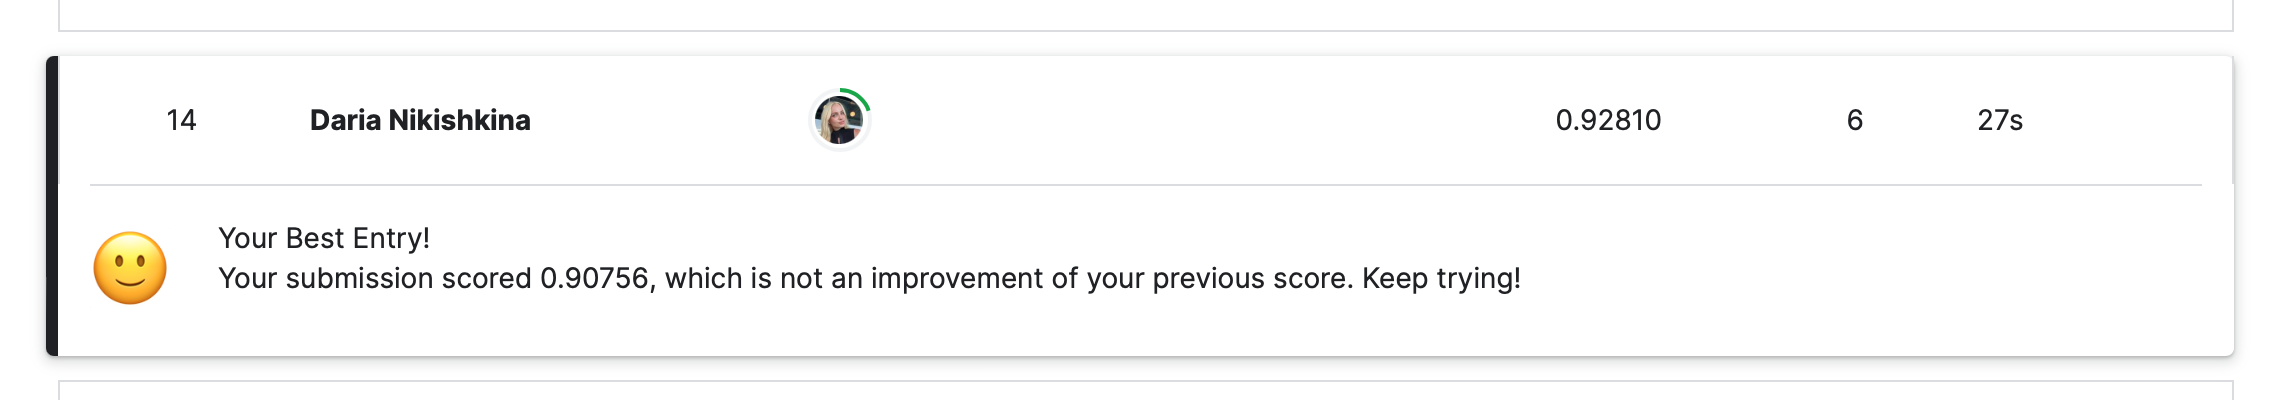